### The Newton-Raphson Method

The Newton-Raphson method is a root finder that uses the derivative of the function whose root we want to find. The method is based on the idea that the tangent line to a function at a given point is a good approximation of the function near that point. Therefore, if we know the slope of the tangent line, we can find the x-intercept of the tangent line and use that as a better approximation of the root. Here's the iterative formula for the Newton-Raphson method: $$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$


In [7]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
%matplotlib inline

We need the library **sympy** to solve the symbolic derivative of function f(x)

In [8]:
x = smp.symbols('x')
f_sym = x**3 - 2*x**2 - x + 2
f_prime_sym = f_sym.diff(x)

print("Original function f(x):")
display(f_sym)

print("Derivative f'(x):")
display(f_prime_sym)


Original function f(x):


x**3 - 2*x**2 - x + 2

Derivative f'(x):


3*x**2 - 4*x - 1

In [9]:
def newton_raphson(f, f_prime, x0, max_iter=10):
    x = x0
    xs = [x] # stores all the intercepts for plotting later not necessary for the method
    for i in range(1, max_iter):
        x = x - f(x) / f_prime(x)
        #print(f"Iteration {i}: x= {round(x,3)}", end=" ")
        xs.append(x)
        error= abs((xs[i]-xs[i-1])/xs[i])*100
        #print(f"Error:{round(error,3)}")
    root= xs[max_iter-1]
    print(f"The root is {round(root,3)}")
    return root, xs

f= smp.lambdify(x,f_sym)
f_prime= smp.lambdify(x,f_prime_sym)
x0= -0.1
xs= newton_raphson(f, f_prime, x0, 10)[1]
root= newton_raphson(f, f_prime, x0, 10)[0]
root, xs

The root is 2.0
The root is 2.0


(2.0,
 [-0.1,
  3.547368421052632,
  2.752915541646053,
  2.291044787722525,
  2.0695274160632766,
  2.005603474223783,
  2.000041363154791,
  2.0000000022810096,
  2.0,
  2.0])

### Visualization of Newton's Method using Matplotlib

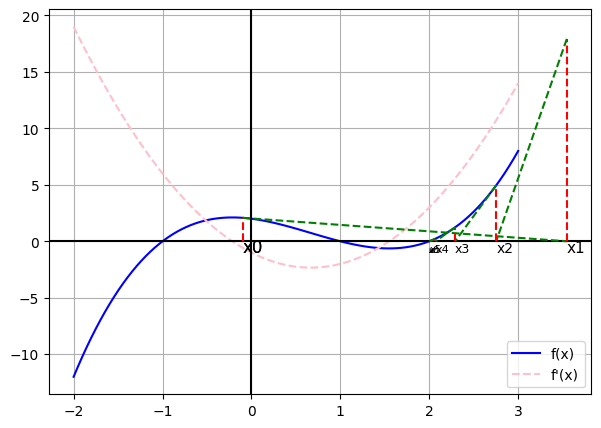

In [ ]:
x_num= np.linspace(-2,3,100)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x_num, f(x_num),'b-', label='f(x)')
ax.plot(x_num, f_prime(x_num),color= 'pink',ls='--', label="f'(x)")
ax.axhline(y=0, color='k', linestyle='-')
ax.axvline(x=0, color='k', linestyle='-')
for i in range(len(xs) - 1):
    x1, x2 = xs[i], xs[i+1]
    y1, y2 = f(x1), f(x2)
    # Vertical line
    ax.plot([x1, x1], [0, y1], 'r--')
    # Tangent line
    m = f_prime(x1)
    b = y1 - m * x1
    x_tangent = np.array([x1, x2])
    y_tangent = m * x_tangent + b
    ax.plot(x_tangent, y_tangent, 'g--')
plt.grid(True)
plt.text(x0, -1,'x0', fontsize=12, color='black')
for i in range(len(xs)):
    plt.text(xs[i], -1, f'x{i}', fontsize=12-i, color='black')
plt.legend()
plt.show()  